In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
salaries_df = pd.read_csv("salaries.csv")

In [3]:
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Machine Learning Research Engineer,20000,USD,20000,FR,50,FR,M
1,2022,SE,FT,Data Architect,190000,USD,190000,US,100,US,M
2,2022,SE,FT,Data Architect,135000,USD,135000,US,100,US,M
3,2022,SE,FT,Data Scientist,179400,USD,179400,US,0,US,M
4,2022,SE,FT,Data Scientist,154000,USD,154000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
941,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
942,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
943,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
944,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [54]:
salaries_df["salary_in_usd"] = (salaries_df["salary_in_usd"] - salaries_df["salary_in_usd"].mean())/ salaries_df["salary_in_usd"].std()

In [4]:
print(salaries_df.columns)
print(salaries_df.info())

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           946 non-null    int64 
 1   experience_level    946 non-null    object
 2   employment_type     946 non-null    object
 3   job_title           946 non-null    object
 4   salary              946 non-null    int64 
 5   salary_currency     946 non-null    object
 6   salary_in_usd       946 non-null    int64 
 7   employee_residence  946 non-null    object
 8   remote_ratio        946 non-null    int64 
 9   company_location    946 non-null    object
 10  company_size        946 non-null    object
dtypes: int64(4), object(7)
memory usage: 

In [5]:
salaries_df.drop(columns=["salary", "salary_currency","company_siz"], inplace=True) # We drop the salary column since we have the same info in salary_in_usd (and the latter one is normalized)

In [6]:
def encoding_column(values):
    encoder = LabelEncoder()
    return encoder.fit_transform(values)
    

In [7]:
categorical_columns = salaries_df.select_dtypes(include='object').columns

In [8]:
for col in categorical_columns:
    salaries_df[col] = encoding_column(salaries_df[col].values)

In [9]:
salaries_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,0,2,47,20000,22,50,21,1
1,2022,3,2,19,190000,60,100,56,1
2,2022,3,2,19,135000,60,100,56,1
3,2022,3,2,28,179400,60,0,56,1
4,2022,3,2,28,154000,60,0,56,1
...,...,...,...,...,...,...,...,...,...
941,2020,3,2,28,412000,60,100,56,0
942,2021,2,2,53,151000,60,100,56,0
943,2020,0,2,28,105000,60,100,56,2
944,2020,0,0,9,100000,60,100,56,0


<AxesSubplot:>

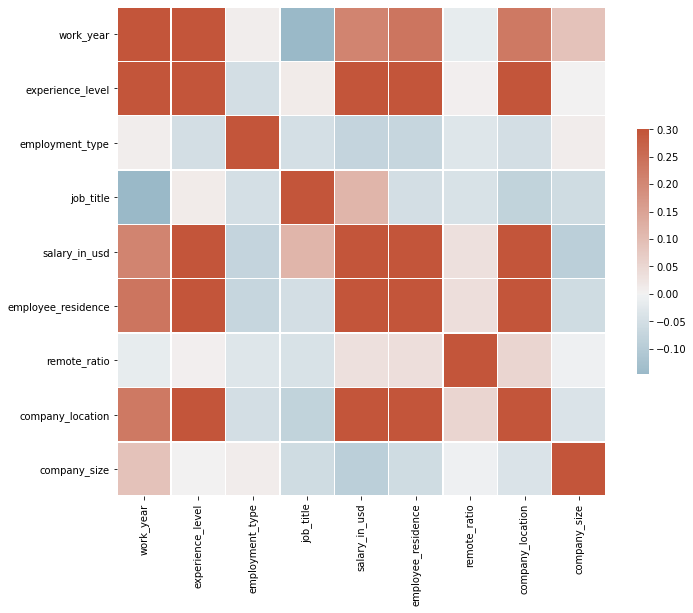

In [10]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(salaries_df.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [56]:
X = salaries_df.drop(columns=["salary_in_usd"])
y = salaries_df["salary_in_usd"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [57]:
tree_regressor = DecisionTreeRegressor()

In [58]:
params = {"max_depth":[5,10,15,20,40]}
grid_search = GridSearchCV(tree_regressor, params)


In [59]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 5}

In [60]:
best_tree_regressor = DecisionTreeRegressor()#max_depth=80)#best_params["max_depth"])
best_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
prediction = best_tree_regressor.predict(X_test)


In [62]:
best_tree_regressor.score(X_test, y_test)

0.3420945634221709

[Text(140.86618221507354, 211.04470588235293, 'X[4] <= 59.0\nmse = 0.987\nsamples = 709\nvalue = 0.0'),
 Text(55.557732077205884, 198.25411764705882, 'X[1] <= 0.5\nmse = 0.405\nsamples = 266\nvalue = -0.72'),
 Text(20.75294117647059, 185.4635294117647, 'X[6] <= 24.5\nmse = 0.212\nsamples = 61\nvalue = -1.115'),
 Text(5.7176470588235295, 172.6729411764706, 'X[3] <= 2.0\nmse = 0.187\nsamples = 37\nvalue = -0.912'),
 Text(1.6941176470588235, 159.88235294117646, 'X[0] <= 2020.5\nmse = 0.069\nsamples = 3\nvalue = -1.412'),
 Text(0.8470588235294118, 147.09176470588235, 'mse = 0.0\nsamples = 1\nvalue = -1.066'),
 Text(2.541176470588235, 147.09176470588235, 'X[3] <= 0.5\nmse = 0.013\nsamples = 2\nvalue = -1.585'),
 Text(1.6941176470588235, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = -1.699'),
 Text(3.388235294117647, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = -1.471'),
 Text(9.741176470588234, 159.88235294117646, 'X[6] <= 7.5\nmse = 0.173\nsamples = 34\nvalue = -0.867'),
 Te

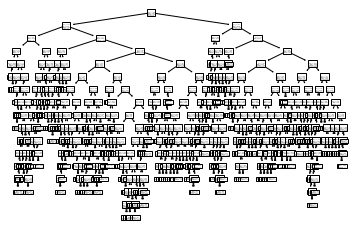

In [63]:
tree.plot_tree(best_tree_regressor)

In [64]:
import graphviz 

dot_data = tree.export_graphviz(best_tree_regressor, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

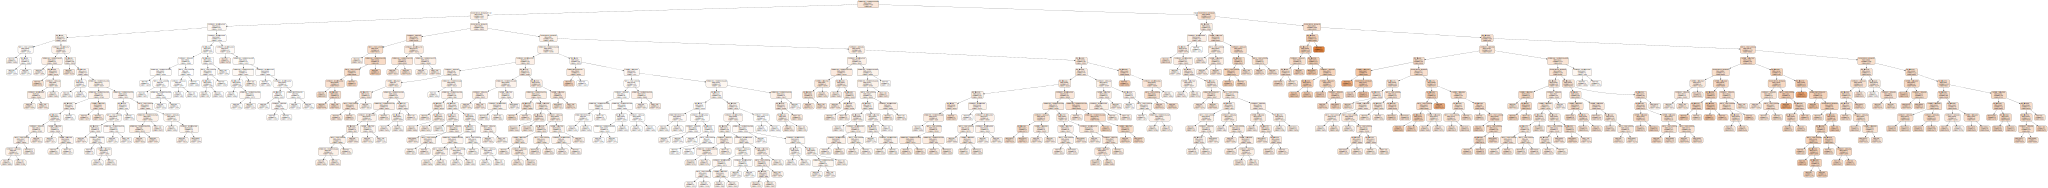

In [66]:
graph